In [1]:
from netCDF4 import Dataset
#import os 
#os.environ['PROJ_LIB']="/Users/mahmud/opt/anaconda3/share/proj"
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import xarray as xr 
#import glob2
import sys
import time 
from datetime import datetime, date, timedelta 
from os.path import exists 
import ipywidgets as widgets
from IPython.display import display
sys.path.insert(0,"/work/cmcc/mg13420/plot_exercises/jup_nbooks/method_function/")
from file_directory import*
from climatology_anomaly import*

/work/cmcc/mg13420/plot_exercises/jup_nbooks/method_function/file_directory.py


In [2]:

## loading target variable  for PDF file 
var_list1= widgets.Dropdown(options= ['analysed_sst','thetao'], value='analysed_sst', description='target_var', dsiable=False)
source_tab=widgets.Tab([widgets.VBox([var_list1])]) 
display(source_tab)
# pre-defined years printing, 
print(var_list1.value)


analysed_sst


In [104]:
var= var_list1.value
print("variable", var)
rdir="/work/cmcc/mg13420/plot_exercises/sst_pdf-exps/"+ var
#file = "pdfParm_"+"{}".format(var)+"_laplace_2022_2020.nc"
file = "pdfParm_{}_skewnorm_2018_2023.nc".format(var)
#file = "pdfParm_{}_skewnorm_2022_2023.nc".format(var)

files =[f for f in sorted(glob(rdir+'/'+"*.nc", recursive =True))]

try:
    pdf_fl=(rdir+"/"+file)
    if exists(pdf_fl):
#    with xr.open_dataset(rdir+"pdfParm_t2m_skew_1991_2020.nc") as pdf_fl: 
        print("PDF File Present=", pdf_fl)
        with xr.open_dataset(pdf_fl) as pdf_file:
            print(pdf_file)
            lon= pdf_file.variables["longitude"]
            lat= pdf_file.variables["latitude"]
            nlat=  len(lat)
            nlon = len(lon)
    else:
        print("PDF file not present")

except FileNotfound as f:
    print(f)
    pass 

for ind,f in enumerate(files):
    print("File {}= ".format(ind), f)


variable analysed_sst
PDF File Present= /work/cmcc/mg13420/plot_exercises/sst_pdf-exps/analysed_sst/pdfParm_analysed_sst_skewnorm_2018_2023.nc
<xarray.Dataset> Size: 3MB
Dimensions:    (lat: 601, lon: 461)
Dimensions without coordinates: lat, lon
Data variables:
    latitude   (lat) float32 2kB ...
    longitude  (lon) float32 2kB ...
    kappa      (lat, lon) float32 1MB ...
    loc        (lat, lon) float32 1MB ...
    lambda     (lat, lon) float32 1MB ...
File 0=  /work/cmcc/mg13420/plot_exercises/sst_pdf-exps/analysed_sst/fitmom_analysed_sst_skewnorm_2018_2023.nc
File 1=  /work/cmcc/mg13420/plot_exercises/sst_pdf-exps/analysed_sst/fitmom_analysed_sst_skewnorm_2022_2023.nc
File 2=  /work/cmcc/mg13420/plot_exercises/sst_pdf-exps/analysed_sst/momData_analysed_sst_2018_2023.nc
File 3=  /work/cmcc/mg13420/plot_exercises/sst_pdf-exps/analysed_sst/pdfParm_analysed_sst_skewnorm_2018_2019.nc
File 4=  /work/cmcc/mg13420/plot_exercises/sst_pdf-exps/analysed_sst/pdfParm_analysed_sst_skewnorm_2

/tmp/ipykernel_58808/938542540.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar=fig.colorbar(csl[i],ax=axs[i], orientation ="horizontal", shrink =0.8, aspect=15., pad=0.07)
/tmp/ipykernel_58808/938542540.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar=fig.colorbar(csl[i],ax=axs[i], orientation ="horizontal", shrink =0.8, aspect=15., pad=0.07)
/tmp/ipykernel_58808/938542540.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar=fig.colorbar(csl[i],ax=axs[i], orientation ="horizontal", 

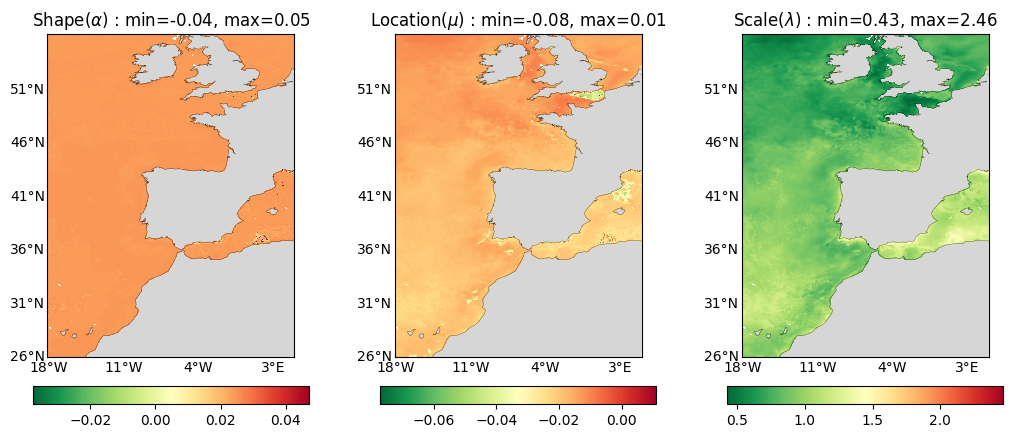

In [106]:

def pdf_plot(pdf_param):
    fig,axs=plt.subplots(1, 3, figsize=(10.5,4.5))
    for i in range(3):
        
        kappa,loc,scale= pdf_param["kappa"], pdf_param["loc"], pdf_param["lambda"]

        tit_kapp = ( r"Shape($\alpha$) :"+' min='+ "{:.2f}".format(np.nanmin(kappa)) +', max='+"{:.2f}".format(np.nanmax(kappa)))
        tit_loc = (r"Location($\mu$) :"+ ' min='+ "{:.2f}".format(np.nanmin(loc)) +', max='+"{:.2f}".format(np.nanmax(loc)))
        tit_lambda = (r"Scale($\lambda$) :"+ ' min='+ "{:.2f}".format(np.nanmin(scale)) +', max='+"{:.2f}".format(np.nanmax(scale)))


        m= Basemap(projection='cyl', resolution='l',llcrnrlat= 26,urcrnrlat= 56.2, llcrnrlon= -18.1, urcrnrlon = 5.,ax=axs[i])
        m.drawcoastlines(linewidth=0.2)
        m.fillcontinents(alpha=0.8)
        m.drawparallels(range(26,56,5), linewidth=1, dashes=[0, 1], labels=[1,0,1,1], color='b', zorder=0 )
        m.drawmeridians(range(-18, 5, 7), linewidth=1, dashes=[0, 1], labels= [1,0,0,1])

        axs[0].set_title(tit_kapp)
        cs1=axs[0].pcolor(lon,lat,kappa[:,:], cmap=plt.cm.RdYlGn_r)#, vmin= "{:.3f}".format(np.nanmin(kappa)), vmax="{:.3f}".format(np.nanmax(kappa)))   #RdYlGn
        #cs1=axs[0].contourf(lon,lat,kappa[:,:], cmap=plt.cm.RdYlGn_r)  #RdYlGn
        
        xlon, xlat = np.meshgrid(lon, lat)
        axs[1].set_title(tit_loc)
        cs2=axs[1].pcolor(lon,lat,loc[:,:], cmap=plt.cm.RdYlGn_r)
        #cs2=axs[1].contour(lon,lat,loc[:,:], cmap="ocean_r" )
        
        axs[2].set_title(tit_lambda)
        cs3=axs[2].pcolor(lon,lat, scale[:,:],cmap="RdYlGn_r") 
        #cs3=axs[2].contourf(lon,lat, scale[:,:],cmap="RdYlGn_r") 
        
        csl=[cs1,cs2,cs3]
        cbar=fig.colorbar(csl[i],ax=axs[i], orientation ="horizontal", shrink =0.8, aspect=15., pad=0.07)
        fig.subplots_adjust(hspace =0.1, wspace=0.005,left=0.01, right=1, top=0.93, bottom=0.01)
        #path= "/Users/mahmud/statistics/hist_figs_pdfs/pdf_figs_publicat/anom_mvg_figs/atm_pdf_plots/"
        path="/work/cmcc/mg13420/plot_exercises/sst_pdf-exps/sst-pdf_figs/"
        plt.savefig(path+"analysed_sst_parm_2018_2023.jpeg", dpi=200)
        #plt.savefig(path+"theta_pdfparm_2022_2023.jpeg", dpi=200)
        
pdf_plot(pdf_file)

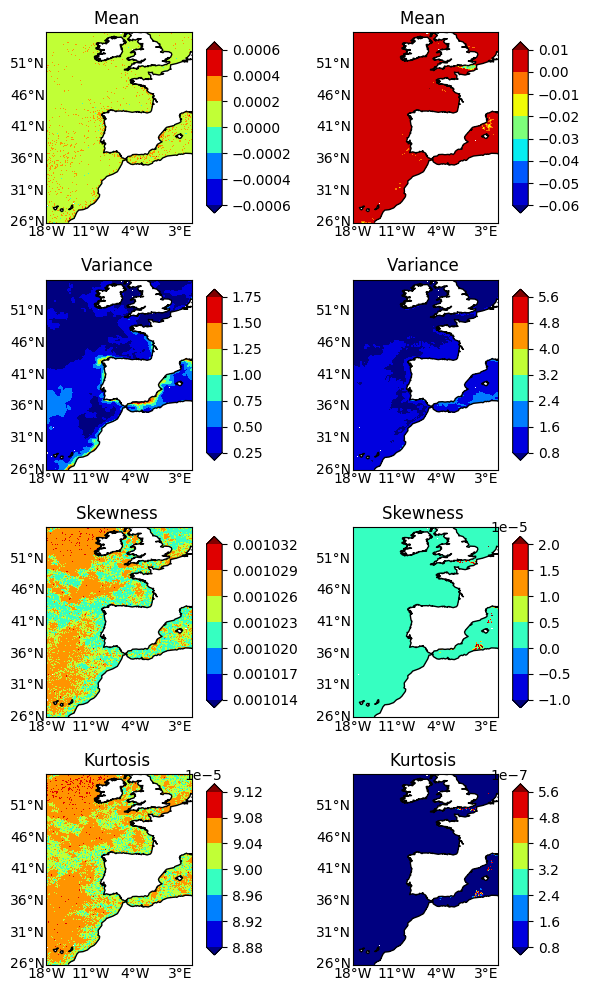

In [98]:

data= Dataset(files[1])
pdf= Dataset(files[0])

data_mom= xr.DataArray(np.zeros((4, nlat, nlon)))
# maksing 0 values incase we have 0 values in the land areas 
data_mom[0, :,:] = np.ma.masked_where(data.variables['mean'][:,:]==0.0, data.variables['mean'])
data_mom[1, :,:] =  np.ma.masked_where(data.variables['variance'][:,:]==0,data.variables['variance'][:,:])
data_mom[2, :,:] = np.ma.masked_where (data.variables['skew'][:,:]==0, data.variables['skew'][:,:])
data_mom[3, :,:] = np.ma.masked_where(data.variables['kurtosis'][:,:]==0, data.variables['kurtosis'][:,:])

# data_mom[0, :,:] = data.variables['mean'][:,:]
#data_mom[1,:,:] = data.variables['variance'][:,:]
# data_mom[2,:,:] = data.variables['skew'][:,:]
# data_mom[3,:,:] = data.variables['kurtosis'][:,:]

#-- PDF moments of fluxes  with masking section
pdf_mom = xr.DataArray(np.zeros((4, nlat, nlon )))

pdf_mom[0,:,:] = pdf.variables['mean']
pdf_mom[1,:,:] = pdf.variables['variance']
pdf_mom[2,:,:] = pdf.variables['skew']
pdf_mom[3:,:] =  pdf.variables['kurtosis']

#------- Title with values if we need-------------------
# mean_val= '\n'+'\n'+'Mean: '+'min=' + "{:.2f}".format(data_mom[0,:,:].min().values) +', max='+"{:.2f}".format(data_mom[0,:,:].max().values )
# std_val= ('Variance: ' + 'min=' + "{:.2f}".format(data_mom[1,:,:].min().values) +', max='+"{:.2f}".format(data_mom[1,:,:].max().values)) 
# skew_val= 'Skewness: '+'min='+ "{:.2f}".format(data_mom[2,:,:].min().values) +', max='+"{:.2f}".format(data_mom[2,:,:].max().values) 
# kurt_val = 'Kurtosis: ' +'min='+ "{:.2f}".format(data_mom[3,:,:].min().values) +', max='+"{:.2f}".format(data_mom[3,:,:].max().values) 

# mean_val1= '\n'+'\n'+'Mean: '+'min=' + "{:.2f}".format(pdf_mom[0,:,:].min().values) +', max='+"{:.2f}".format(pdf_mom[0,:,:].max().values )
# std_val1= ('Variance: ' + 'min=' + "{:.2f}".format(pdf_mom[1,:,:].min().values) +', max='+"{:.2f}".format(pdf_mom[1,:,:].max().values)) 
# skew_val1= 'Skewness: '+'min='+ "{:.2f}".format(pdf_mom[2,:,:].min().values) +', max='+"{:.2f}".format(pdf_mom[2,:,:].max().values) 
# kurt_val1 = 'Kurtosis: ' +'min='+ "{:.2f}".format(pdf_mom[3,:,:].min().values) +', max='+"{:.2f}".format(pdf_mom[3,:,:].max().values) 

# title_data = [mean_val, std_val, skew_val, kurt_val]
# title_pdf = [ mean_val1, std_val1, skew_val1, kurt_val1] 
# -----------------------------------------------------
#-- only titile list 
mean_tit=  'Mean '   
std_tit=  'Variance '  
skew_tit= 'Skewness '  
kurt_tit = 'Kurtosis '

title_list=[mean_tit, std_tit, skew_tit, kurt_tit] 

 ##- Plot value rang- Latent
min_mean, max_mean, mean_delta=  -0.003, 0.003, 0.0002
min_std, max_std, std_delta =     0.2, 2, 0.1
#min_skew, max_skew, skew_delta=  -0.002, 0.002, 0.0002
min_skew, max_skew, skew_delta=  -0.1, 0.1, 0.02
#min_kurt, max_kurt, kurt_delta = -1.2,7,0.5
min_kurt, max_kurt, kurt_delta = -0.2,0.2, 0.05

level_mean= np.arange(min_mean, max_mean, mean_delta)
level_std =np.arange(min_std, max_std, std_delta)
level_skew =np.arange(min_skew, max_skew, skew_delta)
level_kurt =np.arange(min_kurt, max_kurt, kurt_delta)

levels=[level_mean, level_std, level_skew, level_kurt] 


cmaps=[ 'jet', 'jet','jet','jet']
def moments_plt(arr_list1, arr_list2, title_list, levels_list):

    fig,axs =plt.subplots(4,2,figsize=(6,11))
    
    nplots=4
    ncols=2
    for iplot in range(nplots):
        for icols  in range(ncols):
            
            m= Basemap(projection='cyl', resolution='l',llcrnrlat= 26,urcrnrlat= 56, llcrnrlon= -18, urcrnrlon = 5, ax=axs[iplot][icols])
            m.drawcoastlines(linewidth=1)
            m.drawparallels(range(26,56,5), linewidth=1, dashes=[0, 1], labels=[1,0,0,1], color='r', zorder=0 )
            m.drawmeridians(range(-18, 5, 7), linewidth=1, dashes=[0, 1], labels= [1,0,0,1])
            m.fillcontinents(color='white',lake_color='aqua')
           #x, y = m(xlon, xlat)
    
            if icols ==0:
                axs[iplot][icols].set_title(title_list[iplot])
                cs=axs[iplot][icols].contourf(lon,lat,arr_list1[iplot,:,:],   extend='both',cmap=cmaps[iplot])
            if icols ==1:
                axs[iplot][icols].set_title(title_list[iplot])                       
                cs=axs[iplot][icols].contourf(lon,lat,arr_list2[iplot,:,:],  extend='both', cmap=cmaps[iplot])
             
        #   if icols ==2:
        #       axs[iplot][icols].set_title(title_ewb[iplot])                       
        #       cs=axs[iplot][icols].contourf(lon,lat,diff_d2m_ewb[iplot,:,:],level_diff[iplot],extend='both',cmap=cmaps[iplot])
           
            if icols >= 0:
                plt.colorbar(cs,ax=axs[iplot][icols], orientation ="vertical", shrink =0.9, aspect=11, pad=0.07)
             
            # axs[iplot][icols].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
            # axs[iplot][icols].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))                              
            fig.tight_layout(rect=[0, 0.03, 1, 0.94])
            fig.subplots_adjust(hspace =0.3, wspace=0.5)
            mid =(fig.subplotpars.right + fig.subplotpars.left)/2.
            path="/work/cmcc/mg13420/plot_exercises/sst_pdf-exps/sst-pdf_figs/"
            plt.savefig(path+"analysed_sst_pdf_data_moments_2018_2023.jpeg", dpi=200)
            #plt.savefig(path+"theta_pdf_data_moments_2022_2023.jpeg", dpi=200)
             
if __name__=='__main__':

    moments_plt(data_mom, pdf_mom, title_list, levels)
